In [3]:
import geopandas as gpd
import pandas as pd
#import numpy as np
#import rasterio
#from rasterio.mask import mask
#from rasterio.features import shapes
#from shapely.geometry import box
#from shapely.geometry import shape
import matplotlib.pyplot as plt
#from tqdm import tqdm
#from osgeo import gdal
import yaml
import os

# Load configuration
with open('../../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

def resolve_path(relative_path):
    return os.path.join(config['base_path'], relative_path)

EPSG:4326
EPSG:4326


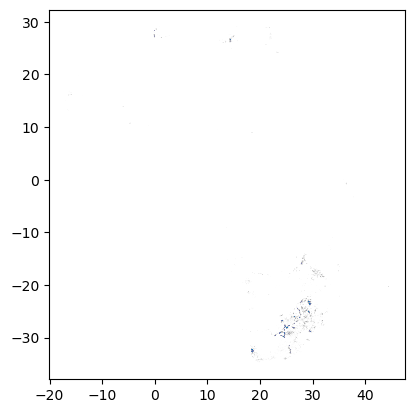

In [5]:
CPIS_2000_path = resolve_path(config['Africa_CPIS_2021_shp_path'])
Africa_All_Arid_path = resolve_path(config['Africa_all_shp_path'])

CPIS_gdf = gpd.read_file(CPIS_2000_path)
Africa_Arid_gdf = gpd.read_file(Africa_All_Arid_path)

# Make sure the coordinate systems are matching
CPIS_gdf.set_crs(epsg=4326, inplace = True)
Africa_Arid_gdf.set_crs(epsg=4326, inplace = True)
print(CPIS_gdf.crs)
print(Africa_Arid_gdf.crs)

combined_gdf = gpd.overlay(CPIS_gdf, Africa_Arid_gdf, how = 'intersection')
combined_gdf['source'] = 'CPIS'
combined_gdf.to_file(resolve_path(config['CPIS_Arid_shp_path']))
combined_gdf.plot()
plt.show()